In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime

In [2]:
%matplotlib inline

In [3]:
SUN = "Sunday"
MON = "Monday"
TUE = "Tuesday"
WED = "Wednesday"
THU = "Thursday"
FRI = "Friday"
SAT = "Saturday"

WEEK = [SUN, MON, TUE, WED, THU, FRI, SAT]
WORK_WEEK = [MON, TUE, WED, THU, FRI]

In [40]:
FILENAME = 'tyme_20170101-20171231.csv'

def read_data(name=FILENAME):
    data = pd.read_csv(name)
    return data

def get_working_hours(filter=None, groups_per_hour = 12):
    
    data = read_data()
    complete_data = {
        SUN: [0]*(24*groups_per_hour),
        MON: [0]*(24*groups_per_hour),
        TUE: [0]*(24*groups_per_hour),
        WED: [0]*(24*groups_per_hour),
        THU: [0]*(24*groups_per_hour),
        FRI: [0]*(24*groups_per_hour),
        SAT: [0]*(24*groups_per_hour),
    }
    
    columns = list(data.columns.values)
    day_index = columns.index("day")
    project_index = columns.index("project")
    task_index = columns.index("task")
    start_index = columns.index("start")
    end_index = columns.index("end")
    
    for row in data.values:
        day = row[day_index]
        project = row[project_index]
        task = row[task_index]
        start = row[start_index]
        end = row[end_index]

        if (filter == None or filter == task):
            start_time = datetime.datetime.strptime(start, '%I:%M %p')
            end_time = datetime.datetime.strptime(end, '%I:%M %p')

            start_time_index = start_time.hour * groups_per_hour + round(start_time.minute/(60/groups_per_hour))
            end_time_index = end_time.hour * groups_per_hour + round(end_time.minute/(60/groups_per_hour))
            
            for time_index in range(start_time_index, end_time_index + 1):
                complete_data[day][time_index] += 1
    return complete_data

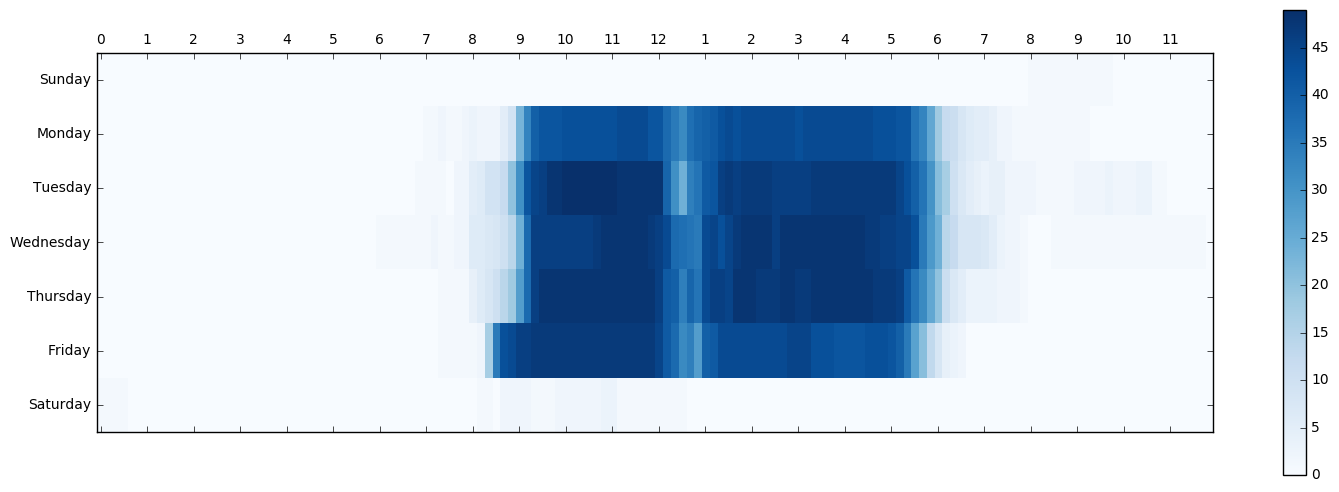

In [63]:
fig = plt.figure(figsize=(18, 6))

ax = fig.add_subplot(111)

WEEK_TYPE = WEEK
# GROUPS_PER_HOUR must be >= 2
GROUPS_PER_HOUR = 6

working_hours = get_working_hours("SkinIO", GROUPS_PER_HOUR)
time_labels = list(map(lambda label: (label if label <= 12 else label - 12), range(24)))

# matshow displays matrices in their native ratio. To get this to display well, the data will
# be padded. That will make each cell rectangular, but will make interpretation of the graph
# much easier.

target_ratio = 3
time_length = len(working_hours[MON])
days_length = len(WEEK_TYPE)
current_ratio = time_length/days_length
padding_scaler = round(current_ratio/target_ratio)

df = []
for day in WEEK_TYPE:
    for _ in range(padding_scaler if padding_scaler > 0 else 1):
        df.append(working_hours[day])
        
ticker_locations = [round(padding_scaler / 2) - 1]
while (ticker_locations[-1] + padding_scaler) < len(df):
    ticker_locations.append(ticker_locations[-1] + padding_scaler)

cax = ax.matshow(df, interpolation='nearest', cmap='Blues')
fig.colorbar(cax)

ax.xaxis.set_major_locator(ticker.MultipleLocator(GROUPS_PER_HOUR))
ax.yaxis.set_major_locator(ticker.FixedLocator(ticker_locations))

ax.set_xticklabels([''] + list(time_labels))
ax.set_yticklabels(list(WEEK_TYPE))

plt.show()